# Planet Isochrones - Mass Group Project 3
## Author:  Jason Wang (Northwestern University/CIERA)

Run the [SSW2024_PSF_Setup_Subtraction](https://colab.research.google.com/drive/1AmrmAj459MwUt4kkUbfquxnf1GkyO_F2?usp=share_link) notebook to download the data.  The setup notebook needs to just be run **once** once for Hands-on Session IV.

We will convert the flux ratio we measured for a planet into mass.

See the Group Project Idea 3 at the end of [SSW2024_ImagingExoplanets.ipynb](https://colab.research.google.com/drive/1XVUe9-qYAQs_9VVszxuw8Mih49dnhZjX?usp=sharing).

In [31]:
!pip install typeguard --upgrade

## &#128309; Setup Python running on your own computer directory

**Run the Next cell**

In [21]:
# Enter the full path to your PSF_Subtraction directory where you downloaded the data in the Setup notebbook
# For example:  '/Users/jsmith/PSF_Subtraction'
import os
absolute_path_to_the_data_folder_on_your_machine = '/home/fabian/Sagan_Workshop/SSW2024_notebooks/' # Please complete!
os.chdir(absolute_path_to_the_data_folder_on_your_machine)

# The rest of the notebook cells are for &#128992; Colab or &#128309; running Python on your computer

# Import `species` and setup your environment

You may get "errors" about MultiNest. You can safely ignore all of them.

If you are getting errors with a stacktrace indicating `species` did not load, try reloading the notebook and re-executing these cells.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import species
from species.data.database import Database
from species.read.read_isochrone import ReadIsochrone

%matplotlib inline

In [3]:
species.SpeciesInit()

species v0.8.4

Working folder: /home/fabian/Sagan_Workshop/SSW2024_notebooks

Configuration file: /home/fabian/Sagan_Workshop/SSW2024_notebooks/species_config.ini
Database file: /home/fabian/Sagan_Workshop/SSW2024_notebooks/species_database.hdf5
Data folder: /home/fabian/Sagan_Workshop/SSW2024_notebooks/data

Configuration settings:
   - Database: /home/fabian/Sagan_Workshop/SSW2024_notebooks/species_database.hdf5
   - Data folder: /home/fabian/Sagan_Workshop/SSW2024_notebooks/data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py not installed


# Download evolutionary model

We will use the AMES-COND (Baraffe et al. 2003) model for this task. This is one of the classical models used for converting brightness to mass.

In [4]:
database = Database()

In [5]:
database.add_isochrones(model='ames')
read_iso = ReadIsochrone(tag='ames-cond')


------------------
Add isochrone grid
------------------

Evolutionary model: ames
File name: None
Database tag: None

Adding isochrones: ames-cond... [DONE]
Database tag: ames-cond

Adding isochrones: ames-dusty... [DONE]
Database tag: ames-dusty

-------------------
Read isochrone grid
-------------------

Database tag: ames-cond
Create regular grid: False


# Plot curves of how bright an object is at 40 Myr as a function of mass

We will plot the L-band brightness (this is the wavelength band from the Keck data) of planets as a function of mass at 40 Myr (the age of the system).

Note that this plots the absolute magnitude in L-band (apparent magnitude at 10 pc)!

In [21]:
iso_box = read_iso.get_isochrone(age=80.,
                                 masses=np.linspace(1., 30., 50),
                                 filter_mag="L'")
iso_box.open_box()

Opening IsochroneBox...
model = ames-cond
age = 80.0
mass = [ 1.          1.59183673  2.18367347  2.7755102   3.36734694  3.95918367
  4.55102041  5.14285714  5.73469388  6.32653061  6.91836735  7.51020408
  8.10204082  8.69387755  9.28571429  9.87755102 10.46938776 11.06122449
 11.65306122 12.24489796 12.83673469 13.42857143 14.02040816 14.6122449
 15.20408163 15.79591837 16.3877551  16.97959184 17.57142857 18.16326531
 18.75510204 19.34693878 19.93877551 20.53061224 21.12244898 21.71428571
 22.30612245 22.89795918 23.48979592 24.08163265 24.67346939 25.26530612
 25.85714286 26.44897959 27.04081633 27.63265306 28.2244898  28.81632653
 29.40816327 30.        ]
teff = [ 324.09832356  390.74918936  452.42367981  495.36093882  537.65484792
  578.89721513  620.13958234  661.38194955  701.20139964  740.47398754
  776.06671541  813.52061591  855.32794705  896.23790205  936.3503414
  978.60804699 1021.545306   1126.80895974 1232.73969744 1338.67043513
 1408.76277871 1434.939441   1461.1161033

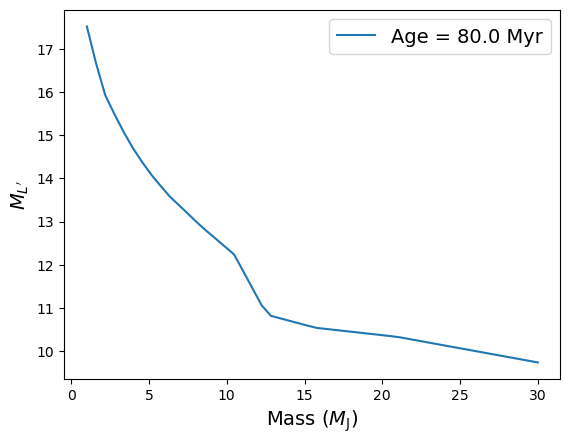

In [22]:
plt.plot(iso_box.mass, iso_box.magnitude, label=f'Age = {iso_box.age} Myr')
plt.xlabel(r'Mass ($M_\mathrm{J}$)', fontsize=14)
plt.ylabel(r"$M_{L'}$", fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Convert your measured L-band flux ratio to a planet absolute magnitude

Change the flux ratio to the one you measured.

In [17]:
planet_fluxratio = 8e-5 # INSERT YOUR MEASURED FLUX RATIO HERE

star_lmag = 5.22
star_abs_lmag = star_lmag - 5 * np.log10(40.879/10)
planet_abs_lmag = star_abs_lmag - 2.5 * np.log10(planet_fluxratio)
print(planet_abs_lmag)

12.404773715746181


# Interpolate the evolutionary model to determine the mass of the planet

In [18]:
planet_mass = np.interp(planet_abs_lmag, iso_box.magnitude[::-1], iso_box.mass[::-1])
print(planet_mass) # Jupiter masses

4.6322779007356685
